<a href="https://colab.research.google.com/github/krishnx27/Linkedin-Job-analysis-using-Pyhton/blob/main/LinkedinJobAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [36]:
data = pd.read_csv('/content/LinkedIn_Jobs_Data_India.csv')

In [37]:
data.head(5)

,Unnamed: 0,id,publishedAt,title,companyName,postedTime,applicationsCount,description,contractType,experienceLevel,workType,sector,companyId,city,state,recently_posted_jobs
0,0,3800928381,2024-01-09,Front-end Engineer/Web Developer (SDE 1 &amp; 2),BOX8,3 weeks ago,85.0,"Skill: html5 , ajax , oop , git , postgresql ,...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No
1,1,3800929078,2024-01-09,Android Developer-SDE 1 &amp; 2(Software Devel...,BOX8,3 weeks ago,80.0,"Skill: algorithms , rest , github , css , html...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No
2,2,3792399495,2023-12-27,Web Developer,Mahe Technologies Private Limited,1 month ago,75.0,The ideal candidate is a creative problem solv...,Full-time,Executive,Engineering and Information Technology,Information Technology & Services,14387125,Greater Kolkata Area,NaN,No
3,3,3792604197,2023-12-27,Web Developer,Mahe Technologies Private Limited,1 month ago,52.0,The ideal candidate is a creative problem solv...,Full-time,Executive,Engineering and Information Technology,Information Technology & Services,14387125,Greater Kolkata Area,NaN,No
4,4,3808399427,2024-01-23,Software Engineer,Microsoft,1 week ago,26.0,Do you have a passion for security? Do you lik...,Full-time,Not Applicable,Engineering and Information Technology,Software Development,1035,Hyderabad,Telangana,Yes


In [38]:
data.columns

Index(['Unnamed: 0', 'id', 'publishedAt', 'title', 'companyName', 'postedTime',
       'applicationsCount', 'description', 'contractType', 'experienceLevel',
       'workType', 'sector', 'companyId', 'city', 'state',
       'recently_posted_jobs'],
      dtype='object')

In [39]:
data.shape

(949, 16)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            949 non-null    int64  
 1   id                    949 non-null    int64  
 2   publishedAt           857 non-null    object 
 3   title                 949 non-null    object 
 4   companyName           949 non-null    object 
 5   postedTime            949 non-null    object 
 6   applicationsCount     949 non-null    float64
 7   description           949 non-null    object 
 8   contractType          860 non-null    object 
 9   experienceLevel       949 non-null    object 
 10  workType              860 non-null    object 
 11  sector                860 non-null    object 
 12  companyId             949 non-null    int64  
 13  city                  949 non-null    object 
 14  state                 871 non-null    object 
 15  recently_posted_jobs  9

In [41]:
#Here We check any duplicate Record in this Datset? If yes, then remove the duplicate records
data.duplicated().sum()


np.int64(0)

In [42]:
#Which companies are the most active in posting jobs on Linkedin
company_job_counts = data.groupby('companyName').size().reset_index(name='job_count')
print(company_job_counts.head(20))


                              companyName  job_count
0                            .efficiently          1
1                                 10times          1
2                               56 Secure          1
3                               66degrees          1
4                                7-Eleven          1
5                                 99Games          1
6                    A.P. Moller - Maersk          1
7                      AB InBev GCC India          1
8                        AKMV Consultants          1
9              ALL - Accor Live Limitless          3
10                                   AVPN          1
11                              AXISCADES          1
12  Able Design and Manufacturing Pvt Ltd          4
13                                   Acko          1
14                          Acme Services          6
15                              Actualize          1
16              Acuity Knowledge Partners          1
17                               AdEngage     

In [43]:

most_active_companies = company_job_counts.sort_values(by='job_count', ascending=False)
print(most_active_companies.head(10))

                                           companyName  job_count
487                                       Tata Cummins         20
179                                         Freshworks         17
203                                             Google         12
21                                Aditya Birla Capital         11
134  Dubai Jobs, Gulf Jobs, Jobs in Dubai, Qatar, K...         11
335                                          Microsoft         10
489                                  Tata Technologies         10
252                                            Infosys         10
559                                          Visanswer          9
365                                            NxtWave          9


Which Sector are currently in high demand for hiring


In [44]:

sector_job_counts = data.groupby('sector').size().reset_index(name='job_count')
print(sector_job_counts.head(10))

                                              sector  job_count
0                                         Accounting          2
1                Administrative and Support Services          1
2                               Advertising Services         16
3        Advertising Services and Marketing Services          2
4  Advertising Services, Broadcast Media Producti...          1
5  Advertising Services, Media Production, and Ev...          2
6  Advertising Services, Online Audio and Video M...          1
7                                          Animation          1
8                                  Apparel & Fashion          1
9  Appliances, Electrical, and Electronics Manufa...         28


Which sector are currently high demand for hiring


In [45]:
data.groupby('sector').size().reset_index(name='job_count')
most_in_demand_sectors = sector_job_counts.sort_values(by='job_count', ascending=False)

most_in_demand_sectors.head()
# Display fewer r/c
most_in_demand_sectors.head().style.set_table_attributes('style="display:inline"').set_table_styles(
    [{'selector': 'th', 'props': [('padding', '4px')]},
     {'selector': 'td', 'props': [('padding', '4px')]}]
)


,sector,job_count
97,IT Services and IT Consulting,85
191,Software Development,74
203,Staffing and Recruiting,47
72,Financial Services,42
206,"Technology, Information and Internet",42


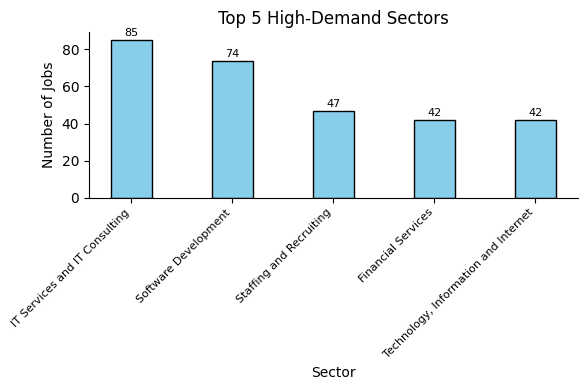

In [46]:
import matplotlib.pyplot as plt

# Dta
sectors = [
    'IT Services and IT Consulting',
    'Software Development',
    'Staffing and Recruiting',
    'Financial Services',
    'Technology, Information and Internet'
]
job_counts = [85, 74, 47, 42, 42]

plt.figure(figsize=(6,4))
bar_width = 0.4
bars = plt.bar(sectors, job_counts, color='skyblue', edgecolor='black', width=bar_width)
plt.title('Top 5 High-Demand Sectors', fontsize=12)
plt.xlabel('Sector', fontsize=10)
plt.ylabel('Number of Jobs', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)

for bar, count in zip(bars, job_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, str(count),
             ha='center', va='bottom', fontsize=8)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()


In [101]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=most_in_demand_sectors)

https://docs.google.com/spreadsheets/d/19rkZrBnIk153f1p2de8zqfCOmRX7x-FeyC_YAvss94E/edit#gid=0


Which are the most common contracts types for jobposting?


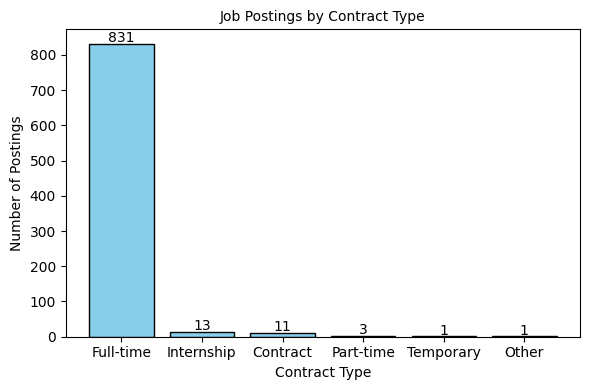

In [48]:
# Count the occurrences of each contract type
contract_type_counts = data['contractType'].value_counts()
contract_type_counts
import matplotlib.pyplot as plt

# Data
contract_types = {
    'Full-time': 831,
    'Internship': 13,
    'Contract': 11,
    'Part-time': 3,
    'Temporary': 1,
    'Other': 1
}

plt.figure(figsize=(6,4))
plt.bar(contract_types.keys(), contract_types.values(), color='skyblue', edgecolor='black')

plt.title('Job Postings by Contract Type', fontsize=10)
plt.xlabel('Contract Type', fontsize=10)
plt.ylabel('Number of Postings', fontsize=10)

for i, val in enumerate(contract_types.values()):
    plt.text(i, val + 5, str(val), ha='center', fontsize=10)

plt.tight_layout()
plt.show()





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [49]:
print(data['experienceLevel'].head())
print(data['experienceLevel'].dtype)


0       Entry level
1       Entry level
2         Executive
3         Executive
4    Not Applicable
Name: experienceLevel, dtype: object
object


In [50]:
import pandas as pd

exp_mapping = {
    'Internship': 0,
    'Entry level': 1,
    'Mid level': 2,
    'Senior level': 3,
    'Executive': 4,
    'Not Applicable': 5
}
data['experienceLevel_num'] = data['experienceLevel'].map(exp_mapping)

correlation = data['applicationsCount'].corr(data['experienceLevel_num'], method='spearman')

print("Correlation between number of applications and experience level:", correlation)


Correlation between number of applications and experience level: 0.14425405217639534


Is there any correlaion between the number of applications received and experience level required for the job?


A correlation coefficient close to 0 indicates a weak linear relationship between the variables. Here, a correlation coefficient of 0.0462 suggests that there is a very weak positive correlation between the number of applications received and the experience level required for the job.

What is the average number of application per job posting?


In [51]:
# Calculate the average number of applications per job posting
average_applications_per_job = data['applicationsCount'].mean()
print("Average number of applications per job posting:", average_applications_per_job)

Average number of applications per job posting: 116.99789251844047


Which citis have the higest number of job posting?


In [52]:
city_job_counts = data['city'].value_counts()
print(city_job_counts.head(20))

city
Bengaluru                     196
Mumbai                        123
Gurugram                       67
Pune                           62
Hyderabad                      54
Chennai                        42
Noida                          31
India                          30
Gurgaon                        25
Delhi                          24
Bangalore Urban                22
Ahmedabad                      18
Greater Kolkata Area           14
Bengaluru East                 12
Greater Bengaluru Area         11
Jaipur                         10
Navi Mumbai                    10
Bengaluru North                 9
Mumbai Metropolitan Region      9
Indore                          8
Name: count, dtype: int64


In [53]:
import folium

# Top 20 cities data: city -> [lat, lon, job_count]
city_data = {
    'Bengaluru': [12.9716, 77.5946, 196],
    'Mumbai': [19.0760, 72.8777, 123],
    'Gurugram': [28.4595, 77.0266, 67],
    'Pune': [18.5204, 73.8567, 62],
    'Hyderabad': [17.3850, 78.4867, 54],
    'Chennai': [13.0827, 80.2707, 42],
    'Noida': [28.5355, 77.3910, 31],
    'India': [20.5937, 78.9629, 30],
    'Gurgaon': [28.4646, 77.0299, 25],
    'Delhi': [28.7041, 77.1025, 24],
    'Bangalore Urban': [12.9716, 77.5946, 22],
    'Ahmedabad': [23.0225, 72.5714, 18],
    'Greater Kolkata Area': [22.5726, 88.3639, 14],
    'Bengaluru East': [13.0213, 77.6411, 12],
    'Greater Bengaluru Area': [12.9716, 77.5946, 11],
    'Jaipur': [26.9124, 75.7873, 10],
    'Navi Mumbai': [19.0330, 73.0297, 10],
    'Bengaluru North': [13.0843, 77.5831, 9],
    'Mumbai Metropolitan Region': [19.0760, 72.8777, 9],
    'Indore': [22.7196, 75.8577, 8]
}

# Create base map
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add color-coded circle markers with numbers on top
for city, (lat, lon, jobs) in city_data.items():
    folium.CircleMarker(
        location=[lat, lon],
        radius=5 + jobs / 20,  # Size based on jobs
        color='red' if jobs > 100 else 'orange' if jobs > 50 else 'green',
        fill=True,
        fill_opacity=0.6,
        popup=f"{city}: {jobs} jobs"
    ).add_to(m)

    # Add number text marker
    folium.map.Marker(
        [lat, lon],
        icon=folium.DivIcon(html=f"""
            <div style="font-size: 10pt; font-weight: bold; text-align: center">{jobs}</div>
        """)
    ).add_to(m)

# Save and show map
m.save("top_20_cities_job_map_numbers.html")
m


So here we see where we live in Indore and they are having the last of 20th position of the job posting ☹

What is the most common level of Experience required for the job posting?


In [54]:
experience_level_counts = data['experienceLevel'].value_counts()



In [55]:
print(data['experienceLevel'].dropna().unique())


['Entry level' 'Executive' 'Not Applicable' 'Mid-Senior level' 'Associate'
 'Internship' 'Full-time' 'Director' 'Part-time']


In [56]:
most_common_experience_level = experience_level_counts.idxmax()
print("Most common level of experience required for job postings:", most_common_experience_level)

Most common level of experience required for job postings: Mid-Senior level


What is the average number of applications recived per sector?


In [57]:
avg_applications_per_sector = data.groupby('sector')['applicationsCount'].mean()

print(avg_applications_per_sector)

sector
Accounting                                                                                                                        112.5000
Administrative and Support Services                                                                                                25.0000
Advertising Services                                                                                                               88.6875
Advertising Services and Marketing Services                                                                                       200.0000
Advertising Services, Broadcast Media Production and Distribution, and Technology, Information and Media                          200.0000
                                                                                                                                    ...   
Wellness and Fitness Services                                                                                                      34.5000
Wholesale Building M

Which cities have the highest number of job postings for entry-level positions (experienceLevel='Entry Level') in the 'Staffing and Recruiting' sector

In [58]:

filtered_df = data[(data['experienceLevel'] == 'Entry level') & ((data['sector'] == 'Staffing and Recruiting') )]

In [59]:
city_job_counts = filtered_df['city'].value_counts()
city_job_counts

,count
city,
Bengaluru,5
Chennai,3
Pune,2
Bangalore Urban,2
Mumbai,2
Gurugram,2
Thane,2
Navi Mumbai,2
Ahmedabad,1


What is the average number of applications received for job postings requiring Entry level of experience in the 'IT Services and IT Consulting' sector or the 'Staffing and Recruiting?

In [60]:
filtered_df = data[((data['experienceLevel'] == 'Entry level') & (data['sector'] == 'IT Services and IT Consulting') | (data['sector'] == 'Staffing and Recruiting'))]
filtered_df
data.head(5)

,Unnamed: 0,id,publishedAt,title,companyName,postedTime,applicationsCount,description,contractType,experienceLevel,workType,sector,companyId,city,state,recently_posted_jobs,experienceLevel_num
0,0,3800928381,2024-01-09,Front-end Engineer/Web Developer (SDE 1 &amp; 2),BOX8,3 weeks ago,85.0,"Skill: html5 , ajax , oop , git , postgresql ,...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No,1.0
1,1,3800929078,2024-01-09,Android Developer-SDE 1 &amp; 2(Software Devel...,BOX8,3 weeks ago,80.0,"Skill: algorithms , rest , github , css , html...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No,1.0
2,2,3792399495,2023-12-27,Web Developer,Mahe Technologies Private Limited,1 month ago,75.0,The ideal candidate is a creative problem solv...,Full-time,Executive,Engineering and Information Technology,Information Technology & Services,14387125,Greater Kolkata Area,NaN,No,4.0
3,3,3792604197,2023-12-27,Web Developer,Mahe Technologies Private Limited,1 month ago,52.0,The ideal candidate is a creative problem solv...,Full-time,Executive,Engineering and Information Technology,Information Technology & Services,14387125,Greater Kolkata Area,NaN,No,4.0
4,4,3808399427,2024-01-23,Software Engineer,Microsoft,1 week ago,26.0,Do you have a passion for security? Do you lik...,Full-time,Not Applicable,Engineering and Information Technology,Software Development,1035,Hyderabad,Telangana,Yes,5.0


Which companies have the highest number of job postings for full-time positions in the 'Software Development' sector and the 'Financial Services'?

In [61]:
filtered_df = data[((data['contractType'] == 'Full-time') | (data['contractType'] == 'Permanent')) & ((data['sector'] == 'Software Development') | (data['sector'] == 'Financial Services'))]
filtered_df

,Unnamed: 0,id,publishedAt,title,companyName,postedTime,applicationsCount,description,contractType,experienceLevel,workType,sector,companyId,city,state,recently_posted_jobs,experienceLevel_num
4,4,3808399427,2024-01-23,Software Engineer,Microsoft,1 week ago,26.0,Do you have a passion for security? Do you lik...,Full-time,Not Applicable,Engineering and Information Technology,Software Development,1035,Hyderabad,Telangana,Yes,5.0
5,5,3803684281,2024-01-17,Software Engineer,Microsoft,2 weeks ago,200.0,Microsoft Endpoint Manager (MEM) Is An Integra...,Full-time,Not Applicable,Engineering and Information Technology,Software Development,1035,Noida,Uttar Pradesh,No,5.0
21,21,3808000044,2024-01-22,Software Engineer,Microsoft,1 week ago,120.0,Security represents the most critical prioriti...,Full-time,Not Applicable,Engineering and Information Technology,Software Development,1035,Hyderabad,Telangana,Yes,5.0
22,22,3807487394,2024-01-22,Software Engineer,Intuit,1 week ago,139.0,Overview:\n\n\n\nCome join the ProConnect team...,Full-time,Mid-Senior level,Engineering and Information Technology,Software Development,1666,Bengaluru,Karnataka,Yes,NaN
24,24,3800587016,2024-01-12,Software Engineer Test,PhonePe,3 weeks ago,200.0,About PhonePe\n\nPhonePe is India’s leading di...,Full-time,Mid-Senior level,Engineering and Information Technology,Software Development,10479149,Bangalore Urban,Karnataka,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,870,3813504011,2024-01-25,Editor (Content Writer) - Mumbai,Nielsen,1 week ago,29.0,"At Nielsen, we believe that career growth is a...",Full-time,Not Applicable,"Marketing, Public Relations, and Writing/Editing",Software Development,1714,Mumbai,Maharashtra,Yes,5.0
798,886,3787871655,2024-01-03,Content Writer,Livspace,1 month ago,200.0,ABOUT US\n\n\n\n\nLivspace is Asiaʼs largest a...,Full-time,Associate,"Design, Art/Creative, and Marketing",Software Development,2963287,Bangalore Urban,Karnataka,No,NaN
804,892,3802065898,2024-01-15,Finance Copywriter,Groww,2 weeks ago,52.0,About Groww\n\n\n\n\nWe are a passionate group...,Full-time,Associate,"Writing/Editing, Marketing, and Finance",Financial Services,10813156,Bengaluru,Karnataka,No,NaN
822,911,3769027853,2024-01-12,Copywriter,INDmoney,3 weeks ago,67.0,"As a Copywriter, you will be involved in creat...",Full-time,Mid-Senior level,Marketing,Financial Services,14406593,Gurugram,Haryana,No,NaN


In [62]:
company_job_counts = filtered_df['companyName'].value_counts()

In [63]:
print(company_job_counts.head(10))

companyName
Freshworks                       17
Aditya Birla Capital             11
Microsoft                        10
Eazy ERP Technologies Pvt Ltd     6
ValGenesis                        3
Navi                              3
Mindtickle                        2
MakeMyTrip                        2
Redrob by McKinley Rice           2
Antal International               2
Name: count, dtype: int64


In [64]:
worktype_counts = data['workType'].value_counts()

In [65]:
total_jobs = len(data)
print("Total job postings:", total_jobs)


Total job postings: 949


In [66]:
analyst_count = data['workType'].str.contains('Analyst', case=False, na=False).sum()
print("Total Analyst jobs:", analyst_count)


Total Analyst jobs: 29


In [67]:
total_jobs = len(data)
analyst_percentage = (analyst_count / total_jobs) * 100
print(f"Analyst jobs percentage: {analyst_percentage:.2f}%")


Analyst jobs percentage: 3.06%


In [68]:
most_common_worktype = worktype_counts.idxmax()
print("Most common work type:", most_common_worktype)
print("\nWork type counts:\n", worktype_counts)

Most common work type: Engineering and Information Technology

Work type counts:
 workType
Engineering and Information Technology               164
Human Resources                                       60
Sales and Business Development                        54
Finance and Sales                                     52
Information Technology                                50
                                                    ... 
Engineering and Quality Assurance                      1
Manufacturing, Engineering, and Quality Assurance      1
Engineering and Manufacturing                          1
Manufacturing and Quality Assurance                    1
Production and Manufacturing                           1
Name: count, Length: 131, dtype: int64


In [69]:
unique_titles = data['title'].unique()
print(unique_titles)


['Front-end Engineer/Web Developer (SDE 1 &amp; 2)'
 'Android Developer-SDE 1 &amp; 2(Software Development Engineer)'
 'Web Developer' 'Software Engineer' 'Software Engineer - Fullstack'
 'Software Engineer, Systems Infrastructure'
 'Software Engineer - Front-end Developer' 'SDE 1 (Frontend)'
 'Software Engineer - Applications' 'Frontend Developer'
 'Software Development Engineer 1 (SDE-1)' 'Software Engineer II'
 'Software Engineer- Java' 'Junior Software Developer'
 'Software Engineer II, Full Stack, Google Cloud' 'Jr. Frontend Developer'
 'Bigbasket - Software Development Engineer - Test - Manual Testing'
 'Software Engineer Test' 'Software Engineer - Entry Level - Java'
 'SDE III-Front END (React.JS)' 'Software Engineer ( Intern )'
 'Software Development Engineer'
 'Web / UI Developer (HTML5 / CSS3 / JavaScript)'
 'Software Engineer - Backend (3-5yrs), Pune' 'Software Developer'
 'Software Engineer (Python)' 'Software Engineer, Core' 'Web developer'
 'Web Application Developer' 'SD

In [70]:
num_unique_titles = data['title'].nunique()
print("Total unique job titles:", num_unique_titles)


Total unique job titles: 495


Here we see Top 10 most common job titles

In [71]:
top_titles = data['title'].value_counts().head(10)
print(top_titles)


title
Data Scientist                      47
Product Manager                     35
Business Development Manager        28
Content Writer                      22
Financial Analyst                   20
Copywriter                          19
Mechanical Design Engineer          18
Software Engineer                   18
Human Resources Business Partner    17
Human Resources Manager             16
Name: count, dtype: int64


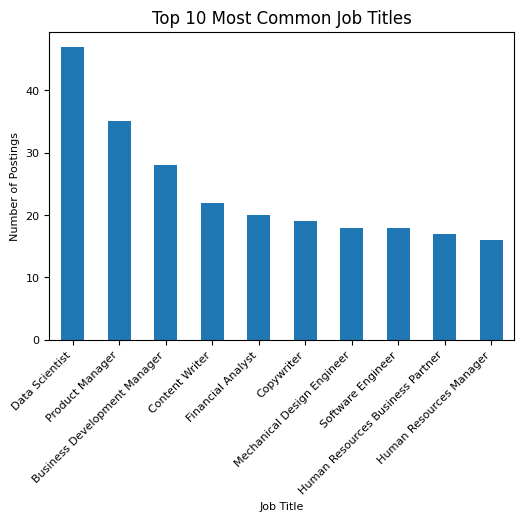

In [86]:
import matplotlib.pyplot as plt

top_titles.plot(kind='bar', figsize=(6,4))
plt.title('Top 10 Most Common Job Titles', fontsize=12)
plt.xlabel('Job Title', fontsize=8)
plt.ylabel('Number of Postings', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.show()



 How does the number of applications vary across different experience levels?


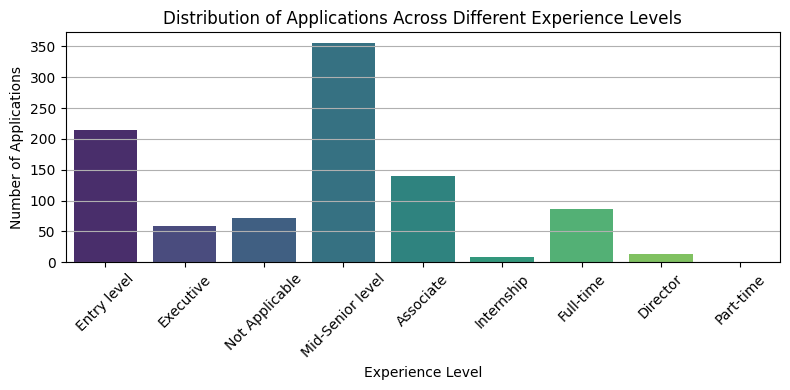

In [76]:

plt.figure(figsize=(8, 4))
sns.countplot(x='experienceLevel', data=data, palette='viridis')
plt.title('Distribution of Applications Across Different Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Insights
**Mid-Senior level positions attract the most applications**, with a significantly higher number compared to other levels.
- **Entry-level and Associate positions** also receive a relatively high number of applications.
- **Not Applicable, Executive, Internship, Full-time, Director, and Part-time positions** receive significantly fewer applications

What is the distibution of job postings by contrat type and experience level?


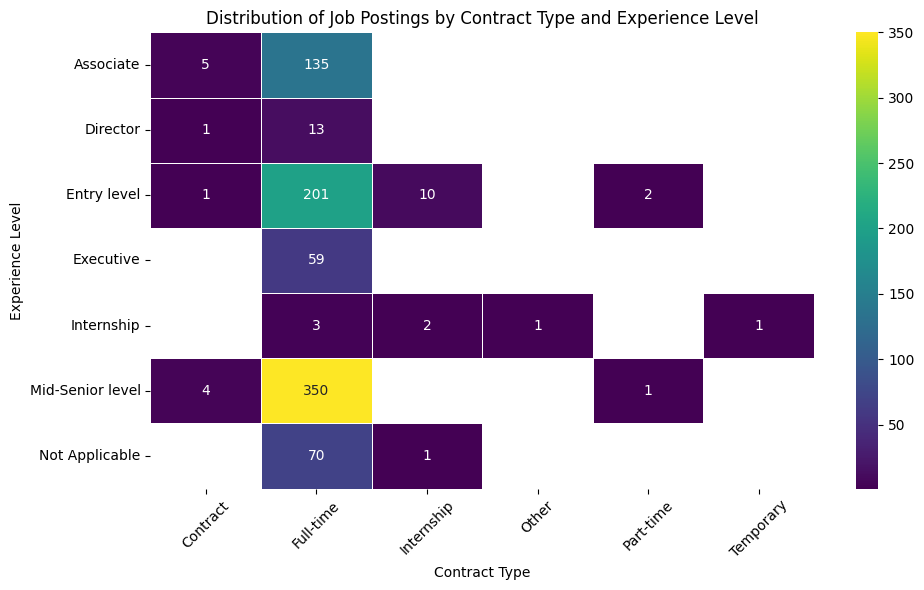

In [77]:

pivot_df = data.pivot_table(index='experienceLevel', columns='contractType', values='title', aggfunc='count')


plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, cmap='viridis', annot=True, fmt='g', linewidths=0.5)
plt.title('Distribution of Job Postings by Contract Type and Experience Level')
plt.xlabel('Contract Type')
plt.ylabel('Experience Level')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Insights
The graphs shows a heatmap representing the distribution of job postings by contract type and experience level. The x-axis lists different contract types (Contract, Full-time, Internship, Other, Part-time, Temporary), while the y-axis represents various experience levels (Associate, Director, Entry level, Executive, Internship, Mid-Senior level, Not Applicable).

- The color intensity of each cell indicates the number of job postings for a particular combination of contract type and experience level. A darker color represents a higher number of job postings, while a lighter color indicates a lower number.

Count of job postings for each contract type within each experience level

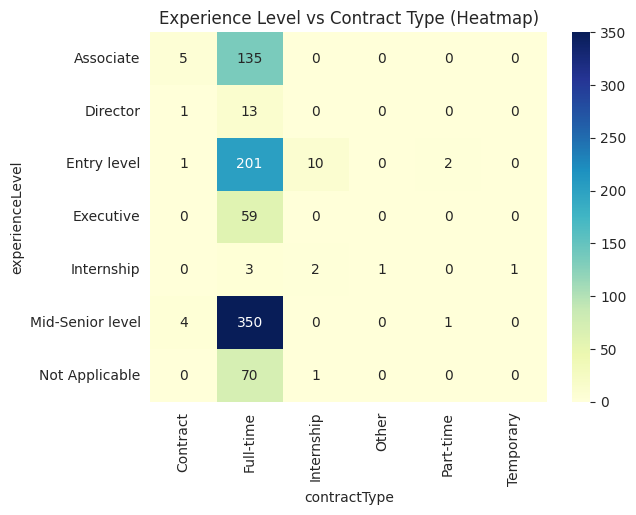

In [96]:
import seaborn as sns
heat_data = pd.crosstab(data['experienceLevel'], data['contractType'])
sns.heatmap(heat_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Experience Level vs Contract Type (Heatmap)')
plt.show()



# Insights

**Most job postings are for full-time contracts**, across all experience levels.
- **Temporary and contract jobs are less common**, but they are more prevalent at entry-level and mid-senior level positions.
- **Internship positions are mostly available for entry-level candidates**.

In [79]:
engineering_jobs = data[data['workType'].str.contains('Engineering', case=False, na=False)]


In [80]:
company_name = "Tata Technologies"  # here as per your specific company name check
company_jobs = engineering_jobs[engineering_jobs['companyName'].str.contains(company_name, case=False, na=False)]

total_applications_company = company_jobs['applicationsCount'].sum()

print(f"Total applications for {company_name} (Engineering jobs):", total_applications_company)


Total applications for Tata Technologies (Engineering jobs): 608.0


In [81]:
# top 10 companies hiring for engineering role
top_companies_engineering = engineering_jobs['companyName'].value_counts().head(10)
print(top_companies_engineering)


companyName
Microsoft                                9
Visanswer                                9
Valeo                                    8
Google                                   7
Tata Technologies                        6
Infosys                                  6
LinkedIn                                 5
Vijaya Enterprises                       5
Able Design and Manufacturing Pvt Ltd    4
YO HR Consultancy                        3
Name: count, dtype: int64


In [87]:
roles_of_interest = ['Associate', 'Software Engineer', 'Analyst']
top_roles_jobs = data[data['title'].str.contains('|'.join(roles_of_interest), case=False, na=False)]
top_roles_count = top_roles_jobs['title'].value_counts()
print(top_roles_count)
applications_per_role = top_roles_jobs.groupby('title')['applicationsCount'].sum().sort_values(ascending=False)
print(applications_per_role)


title
Financial Analyst                             20
Software Engineer                             18
Associate Product Manager                     12
Finance Analyst                                9
Credit Analyst                                 5
                                              ..
Analyst, Financial Planning & Analysis         1
Associate Director Human Resources             1
Sr Associate Human Resources                   1
Associate Human Resources Business Partner     1
Associate Manager - Copywriter                 1
Name: count, Length: 99, dtype: int64
title
Financial Analyst                                   2912.0
Software Engineer                                   2463.0
Associate Product Manager                           2065.0
Finance Analyst                                     1223.0
Credit Analyst                                       867.0
                                                     ...  
Finance Analyst (II)                                  25.